<a target="_blank" href="https://colab.research.google.com/github/DoSomeWaffles/test-ai-safety-basics/blob/main/ex_1_numpy_to_pytorch.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Approximate the sine function with a polynomial of degree 3

The goal of this notebook is to understand the basics of neural networks by creating a simple neural network composed of a single layer.
If you have never heard of neural networks before, we recommend you to watch the following video series (3Blue1Brown) to get a better understanding of the topic:
- 1. [But what is a neural network?](https://www.youtube.com/watch?v=aircAruvnKk) (~20 min)
- 2. [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w) (~20 min)
- 3. [Backpropagation, step-by-step](https://www.youtube.com/watch?v=Ilg3gGewQ5U) (~10 min)
- 4. [Backpropagation calculus](https://www.youtube.com/watch?v=tIeHLnjs5U8) (~10 min "bonus" if you want to understand more about the calculus)

In this notebook, we will be gradually moving up in the abstraction ladder:
- 1. Bare Numpy (You need to compute the gradient by hand)
- 2. Autograd (Here you do not need to compute the gradient by hand anymore)
- 3. torch.nn (Using the nn Abstraction in pytorch)
- 4. Optimizer Abstraction (Finally, we don't even need to iterate on the parameters to update them)

## Tensors
### Warm-up: numpy
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

If you are not familiar with numpy, you can use this website: [speedsheet](https://speedsheet.io/s/numpy)

In [19]:
import matplotlib.pyplot as plt

def plot(y_pred, y, x):
    plt.plot(x, y, label='y (actual)')
    plt.plot(x, y_pred, label='y_pred (predicted)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Given that y is generated using the sine function (y = np.sin(x)), you will fit a third-order polynomial to approximate the sine function using numpy. The polynomial has the form:

$$
[ y_{\text{pred}} = a + bx + cx^2 + dx^3 ]
$$

You need to:

1. Compute the predicted y values (`y_pred`) using the polynomial equation with the given weights and input x.
2. Compute the loss (mean squared error loss) between the predicted y values and the actual y values.
3. Compute the gradients of the loss with respect to the weights a, b, c, and d.
4. Update the weights using gradient descent.

To calculate the gradients, you can use the chain rule of calculus. For each weight, you need to compute the partial derivative of the loss with respect to that weight. Here's a hint on how to calculate the gradients:

- The gradient of the loss with respect to `a` is the sum of the gradients of the loss with respect to each `y_pred` times the gradient of `y_pred` with respect to `a`.
- The gradient of the loss with respect to `b` is the sum of the gradients of the loss with respect to each `y_pred` times the gradient of `y_pred` with respect to `b`.
- Similarly, compute the gradients for `c` and `d`.


<details>

> Add blockquote


<summary>
How to calculate the gradients ?
</summary>

> ### Gradient Computation for Polynomial Regression Models
>
> #### Mean Squared Error Loss Function
>
> The optimization process begins with the Mean Squared Error (MSE) loss function, defined as:
>
> $$
> L = \frac{1}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)^2
> $$
>
> where n represents the number of observations, $y_{\text{pred}_i}$ denotes the predicted value, and $y_i$ represents the observed value.
>
> #### Gradient Derivation
>
> The gradient with respect to any weight parameter w is obtained through application of the chain rule:
>
> $$
> \frac{\partial L}{\partial w} = \frac{1}{n}\sum_{i=1}^n \frac{\partial L}{\partial y_{\text{pred}_i}} \cdot \frac{\partial y_{\text{pred}_i}}{\partial w}
> $$
>
> The derivative of the loss function with respect to the predicted value yields:
>
> $$
> \frac{\partial L}{\partial y_{\text{pred}_i}} = 2(y_{\text{pred}_i} - y_i)
> $$
>
> #### Parameter-Specific Derivatives
>
> For a cubic polynomial with parameters a, b, c, and d, the partial derivatives with respect to each parameter are:
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial a} = 1
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial b} = x_i
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial c} = x_i^2
> $$
>
> $$
> \frac{\partial y_{\text{pred}_i}}{\partial d} = x_i^3
> $$
>
> #### Complete Gradient Expressions
>
> Combining these results yields the following gradient expressions:
>
> For the constant term a:
>
> $$
> \frac{\partial L}{\partial a} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)
> $$
>
> For the linear coefficient b:
>
> $$
> \frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i
> $$
>
> For the quadratic coefficient c:
>
> $$
> \frac{\partial L}{\partial c} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i^2
> $$
>
> For the cubic coefficient d:
>
> $$
> \frac{\partial L}{\partial d} = \frac{2}{n}\sum_{i=1}^n (y_{\text{pred}_i} - y_i)x_i^3
> $$
>
> These gradient expressions govern the parameter updates during optimization. The magnitude and direction of parameter adjustments are determined by both the prediction error $(y_{\text{pred}_i} - y_i)$ and the corresponding polynomial terms. A positive gradient indicates that the parameter should be decreased to reduce the loss function, while a negative gradient suggests an increase in the parameter value.

</details>


In [20]:
import numpy as np
import math

# Create random input and output data. This allows us to generate a random dataset of 1000 points with a y = sin(x) function.
x = np.linspace(-math.pi, math.pi, 1000)
y = np.sin(x)

# Randomly initialize weights between -1 and 1
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3
    # Compute the loss (mean squared error loss) (1/n * sum((y_pred_i - y_i)^2))
    n = len(x)
    loss = (1 / n) * np.sum((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss)

    # Compute the gradients of the loss (mean squared error loss) wrt a, b, c, d, e
    grad_y_pred = 2 * (y_pred - y)
    grad_a = (2/n) * np.sum(grad_y_pred)
    grad_b = (2/n) * np.sum(grad_y_pred * x)
    grad_c = (2/n) * np.sum(grad_y_pred * x ** 2)
    grad_d = (2/n) * np.sum(grad_y_pred * x ** 3)

    # Update weights
    a -= grad_a * learning_rate
    b -= grad_b * learning_rate
    c -= grad_c * learning_rate
    d -= grad_d * learning_rate

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 1.2278206804199499
199 0.8661491422109132
299 0.6115722013649412
399 0.4323197678655851
499 0.30606605168807677
599 0.21711547168289738
699 0.1544293125717054
799 0.11024115292147894
899 0.07908491529173912
999 0.057112250097974625
1099 0.04161290923719696
1199 0.030677603832862103
1299 0.022960923021467225
1399 0.017514553361406136
1499 0.0136699109497904
1599 0.01095551864280327
1699 0.00903882402766536
1799 0.007685215967517197
1899 0.006729147642759379
1999 0.006053784397332832
2099 0.0055766561617132
2199 0.005239540503195509
2299 0.005001327241769629
2399 0.004832984880418474
2499 0.004714009035672589
2599 0.004629916069478757
2699 0.004570474019893784
2799 0.004528453735606759
2899 0.004498747110755929
2999 0.004477744422586789
Result: y = 0.01060468017129554 + 0.8574922769291874 x + -0.0018275768067740434 x^2 + -0.09341439095510408 x^3


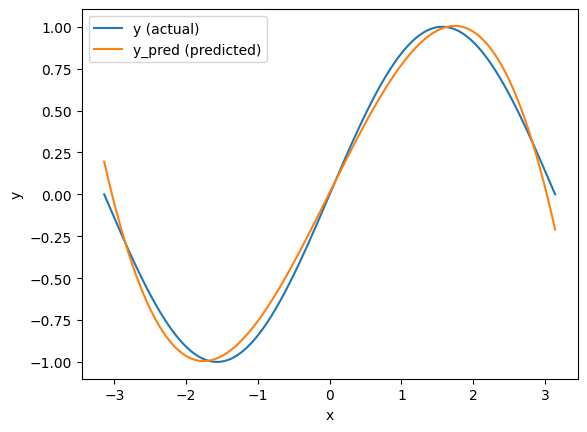

In [21]:
# Check with the plot!
plot(y_pred, y, x)

### PyTorch: Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network.

**Note:** This is very close to the numpy implementation, and is more a translation exercise than one where you need to think a lot. We're just doing things step by step.

You can check the pytorch cheat sheet to get back into the swing of things: https://pytorch.org/tutorials/beginner/ptcheat.html

99 tensor(2.1719)
199 tensor(1.5245)
299 tensor(1.0710)
399 tensor(0.7532)
499 tensor(0.5304)
599 tensor(0.3740)
699 tensor(0.2642)
799 tensor(0.1871)
899 tensor(0.1330)
999 tensor(0.0949)
1099 tensor(0.0681)
1199 tensor(0.0493)
1299 tensor(0.0360)
1399 tensor(0.0267)
1499 tensor(0.0201)
1599 tensor(0.0155)
1699 tensor(0.0122)
1799 tensor(0.0099)
1899 tensor(0.0083)
1999 tensor(0.0072)
2099 tensor(0.0064)
2199 tensor(0.0058)
2299 tensor(0.0054)
2399 tensor(0.0051)
2499 tensor(0.0049)
2599 tensor(0.0048)
2699 tensor(0.0047)
2799 tensor(0.0046)
2899 tensor(0.0045)
2999 tensor(0.0045)
Result: y = 0.013610752299427986 + 0.8546605706214905 x + -0.0023456336930394173 x^2 + -0.0930120125412941 x^3


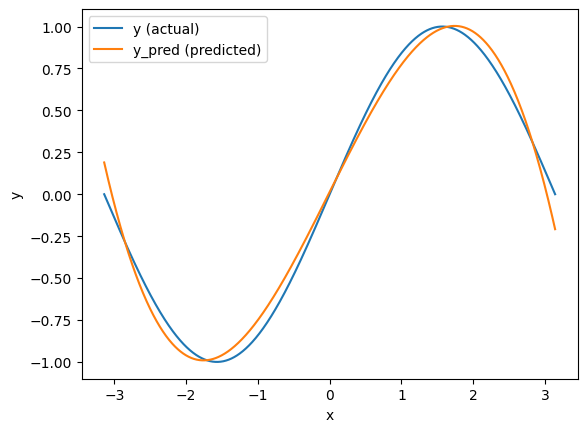

In [22]:
import torch
import math


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# Create random input and output data
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Randomly initialize weights
a = torch.randn((), device=device, dtype=dtype)
b = torch.randn((), device=device, dtype=dtype)
c = torch.randn((), device=device, dtype=dtype)
d = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):
    # Forward pass: compute predicted y
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = (1/n) * torch.sum((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2 * (y_pred - y)
    grad_a = (2/n) * torch.sum(grad_y_pred)
    grad_b = (2/n) * torch.sum(grad_y_pred * x)
    grad_c = (2/n) * torch.sum(grad_y_pred * x ** 2)
    grad_d = (2/n) * torch.sum(grad_y_pred * x ** 3)

    # Update weights using gradient descent
    a -= grad_a * learning_rate
    b -= grad_b * learning_rate
    c -= grad_c * learning_rate
    d -= grad_d * learning_rate


print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

# Check with the plot!
plot(y_pred, y, x)

## Autograd
### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

99 1.605566382408142
199 1.3160113096237183
299 1.0902196168899536
399 0.9035613536834717
499 0.7492061257362366
599 0.6215267777442932
699 0.5158823728561401
799 0.4284447133541107
899 0.3560548424720764
999 0.29610636830329895
1099 0.2464461773633957
1199 0.2052970975637436
1299 0.17119048535823822
1399 0.1429130584001541
1499 0.11946192383766174
1599 0.10000788420438766
1699 0.08386504650115967
1799 0.07046610116958618
1899 0.05934160202741623
1999 0.05010289326310158
2099 0.042428307235240936
2199 0.036051198840141296
2299 0.030750855803489685
2399 0.02634427696466446
2499 0.022679803892970085
2599 0.019631700590252876
2699 0.017095593735575676
2799 0.014985001645982265
2899 0.013228064402937889
2999 0.011765165254473686
3099 0.010546812787652016
3199 0.009531836025416851
3299 0.008686117827892303
3399 0.007981260307133198
3499 0.007393678184598684
3599 0.006903740111738443
3699 0.006495126988738775
3799 0.006154265720397234
3899 0.005869862623512745
3999 0.005632522515952587
4099 

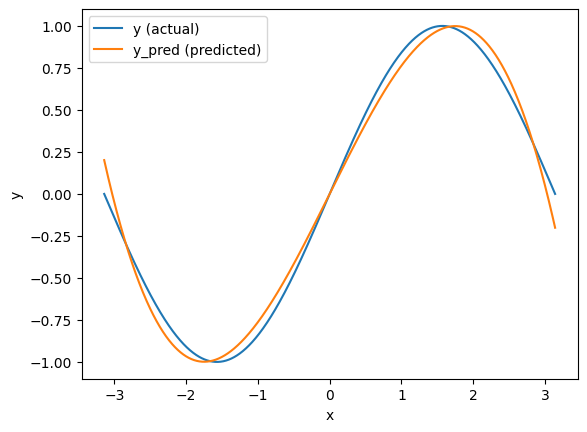

In [23]:
# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 1000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
epochs = 20000
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (1/n) * torch.sum((y_pred - y) ** 2)
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= a.grad * learning_rate
        b -= b.grad * learning_rate
        c -= c.grad * learning_rate
        d -= d.grad * learning_rate

        # Manually zero the gradients after updating weights
        # You can assign None or torch.zeros_like(a)
        a.grad = torch.zeros_like(a)
        b.grad = torch.zeros_like(b)
        c.grad = torch.zeros_like(c)
        d.grad = torch.zeros_like(d)

print(f"Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3")

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)

## nn module
### PyTorch: nn
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:

0 735.2500610351562
1 6904.99365234375
2 130596.859375
3 2602666.5
4 52002752.0
5 1039174208.0
6 20766052352.0
7 414971822080.0
8 8292467736576.0
9 165710273708032.0
10 3311425422360576.0
11 6.617297344633242e+16
12 1.3223510237668966e+18
13 2.6424791648759185e+19
14 5.2805120806509714e+20
15 1.0552145596111559e+22
16 2.108659204568755e+23
17 4.21377649016017e+24
18 8.420484879744197e+25
19 1.682683365056983e+27
20 3.362541220188103e+28
21 6.719444690374297e+29
22 1.3427607987231404e+31
23 2.6832650165113882e+32
24 5.36202462762105e+33
25 1.071505339256462e+35
26 2.1412120803816065e+36
27 4.278828343070606e+37
28 inf
29 inf
30 inf
31 inf
32 inf
33 inf
34 inf
35 inf
36 inf
37 inf
38 inf
39 inf
40 inf
41 inf
42 inf
43 inf
44 inf
45 inf
46 inf
47 inf
48 inf
49 inf
50 inf
51 inf
52 inf
53 inf
54 inf
55 inf
56 inf
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 n

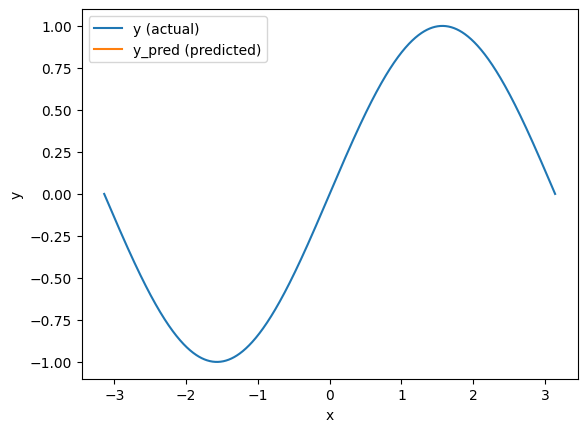

In [30]:
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 1000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# normalize
xx = (xx - xx.mean()) / xx.std()

# In the above code,
# x.unsqueeze(-1) has shape (1000, 1)
# p has shape (3, 1),
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape (1000, 3)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    # Important note: Linear contains a matrix that is always applied to the last dimension of a tensor.
    torch.nn.Linear(3, 1),
    # After the linear layer, the shape is ...
    # Note: Flatten default arguments are Flatten(start_dim = 1, end_dim = -1)
    # By default, start_dim = 1 because 0 corresponds to the batch dimension.
    # We use flatten because we want the final tensor to match the shape of y.
    torch.nn.Flatten(start_dim=0, end_dim=1)
    # After the flatten layer, the shape is ...
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction="sum")

learning_rate = 1e-3
epochs = 3000
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= param.grad * learning_rate

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)

## PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

In [ ]:
# -*- coding: utf-8 -*-
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(torch.nn.Linear(3, 1), torch.nn.Flatten(0, 1))
loss_fn = torch.nn.MSELoss(reduction="sum")

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = ...
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    ...


linear_layer = model[0]
print(
    f"Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3"
)

# Check with the plot!
plot(y_pred.detach().numpy(), y, x)